### Time-Series Forecasting Of Covid-19 Cases In South Africa (CNN+LSTM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('South Africa.csv')

In [3]:
df.head()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
0,05-03-2020,1,1,0,0
1,06-03-2020,1,0,0,0
2,07-03-2020,2,1,0,0
3,08-03-2020,3,1,0,0
4,09-03-2020,7,4,0,0


In [4]:
df.tail()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
154,06-08-2020,538184,8307,9604,306
155,07-08-2020,545476,7292,9909,305
156,08-08-2020,553188,7712,10210,301
157,09-08-2020,559858,6670,10408,198
158,10-08-2020,563598,3740,10621,213


In [5]:
df1=df.reset_index()["Total"]

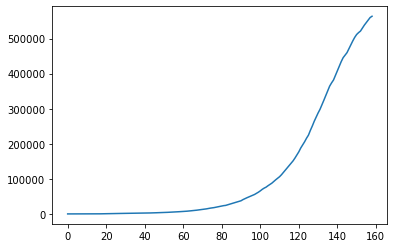

In [6]:
plt.plot(df1)

In [659]:
df1

0            0
1            1
2            1
3            1
4            2
        ...   
160    2750318
161    2801921
162    2859073
163    2912212
164    2962442
Name: Total, Length: 165, dtype: int64

In [627]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [628]:
print(df1)

[[0.00000000e+00]
 [3.37559351e-07]
 [3.37559351e-07]
 [3.37559351e-07]
 [6.75118703e-07]
 [6.75118703e-07]
 [6.75118703e-07]
 [6.75118703e-07]
 [1.01267805e-06]
 [2.36291546e-06]
 [4.38827157e-06]
 [6.41362768e-06]
 [8.43898378e-06]
 [8.43898378e-06]
 [1.14770179e-05]
 [1.75530863e-05]
 [2.59920701e-05]
 [3.30808164e-05]
 [4.08446815e-05]
 [6.75118703e-05]
 [7.89888882e-05]
 [9.82297712e-05]
 [1.44475402e-04]
 [2.09624357e-04]
 [3.05153654e-04]
 [3.80766948e-04]
 [5.21866757e-04]
 [6.38324733e-04]
 [7.42968132e-04]
 [8.21281902e-04]
 [9.83985509e-04]
 [1.15344030e-03]
 [1.31749415e-03]
 [1.43665260e-03]
 [1.54568427e-03]
 [1.92982681e-03]
 [2.30688061e-03]
 [2.67009447e-03]
 [3.05693749e-03]
 [3.46943501e-03]
 [3.75703558e-03]
 [4.06961554e-03]
 [4.63030162e-03]
 [5.37630779e-03]
 [6.02779734e-03]
 [6.62899054e-03]
 [6.99659268e-03]
 [7.48335326e-03]
 [7.90901560e-03]
 [8.52742433e-03]
 [9.55968083e-03]
 [1.02702433e-02]
 [1.13696741e-02]
 [1.23543347e-02]
 [1.30480192e-02]
 [1.369849

In [629]:
training_size=int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [630]:
training_size,test_size

(99, 66)

In [631]:
train_data

array([[0.00000000e+00],
       [3.37559351e-07],
       [3.37559351e-07],
       [3.37559351e-07],
       [6.75118703e-07],
       [6.75118703e-07],
       [6.75118703e-07],
       [6.75118703e-07],
       [1.01267805e-06],
       [2.36291546e-06],
       [4.38827157e-06],
       [6.41362768e-06],
       [8.43898378e-06],
       [8.43898378e-06],
       [1.14770179e-05],
       [1.75530863e-05],
       [2.59920701e-05],
       [3.30808164e-05],
       [4.08446815e-05],
       [6.75118703e-05],
       [7.89888882e-05],
       [9.82297712e-05],
       [1.44475402e-04],
       [2.09624357e-04],
       [3.05153654e-04],
       [3.80766948e-04],
       [5.21866757e-04],
       [6.38324733e-04],
       [7.42968132e-04],
       [8.21281902e-04],
       [9.83985509e-04],
       [1.15344030e-03],
       [1.31749415e-03],
       [1.43665260e-03],
       [1.54568427e-03],
       [1.92982681e-03],
       [2.30688061e-03],
       [2.67009447e-03],
       [3.05693749e-03],
       [3.46943501e-03],


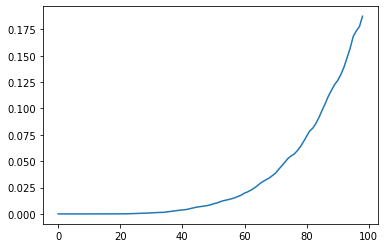

In [632]:
plt.plot(train_data)

In [633]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [634]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [635]:
print(X_train.shape), print(y_train.shape)

(68, 30)
(68,)


(None, None)

In [636]:
print(X_test.shape), print(ytest.shape)

(35, 30)
(35,)


(None, None)

In [637]:
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1],1 )
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1],1 )

In [638]:
X_train.shape[1]

1

In [639]:
X_train.shape

(68, 1, 30, 1)

In [640]:
X_train.shape

(68, 1, 30, 1)

In [641]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

In [642]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu',padding='same'),input_shape=(None,30,1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [643]:
model.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_174 (TimeDi (None, None, 30, 64)      128       
_________________________________________________________________
time_distributed_175 (TimeDi (None, None, 15, 64)      0         
_________________________________________________________________
time_distributed_176 (TimeDi (None, None, 960)         0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 50)                202200    
_________________________________________________________________
dense_92 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 26        
Total params: 203,629
Trainable params: 203,629
Non-trainable params: 0
_______________________________________________

In [645]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=1,verbose=1)

Epoch 1/200
68/68 [==============================] - 0s 3ms/step - loss: 1.3178e-05 - val_loss: 0.0641
Epoch 2/200
68/68 [==============================] - 0s 2ms/step - loss: 5.5370e-06 - val_loss: 0.06361e-
Epoch 3/200
68/68 [==============================] - 0s 2ms/step - loss: 3.0827e-06 - val_loss: 0.0577
Epoch 4/200
68/68 [==============================] - 0s 3ms/step - loss: 7.1092e-06 - val_loss: 0.0643
Epoch 5/200
68/68 [==============================] - 0s 3ms/step - loss: 6.5882e-06 - val_loss: 0.0673
Epoch 6/200
68/68 [==============================] - 0s 3ms/step - loss: 4.4805e-06 - val_loss: 0.0602
Epoch 7/200
68/68 [==============================] - 0s 2ms/step - loss: 5.9593e-06 - val_loss: 0.0508
Epoch 8/200
68/68 [==============================] - 0s 2ms/step - loss: 5.6473e-06 - val_loss: 0.0798
Epoch 9/200
68/68 [==============================] - 0s 2ms/step - loss: 2.1976e-05 - val_loss: 0.0391
Epoch 10/200
68/68 [==============================] - 0s 3ms/step - lo

68/68 [==============================] - 0s 2ms/step - loss: 1.3960e-05 - val_loss: 0.0107
Epoch 156/200
68/68 [==============================] - 0s 2ms/step - loss: 5.8822e-06 - val_loss: 0.0125
Epoch 157/200
68/68 [==============================] - 0s 2ms/step - loss: 4.5801e-06 - val_loss: 0.0128
Epoch 158/200
68/68 [==============================] - 0s 2ms/step - loss: 3.4920e-06 - val_loss: 0.0117
Epoch 159/200
68/68 [==============================] - 0s 2ms/step - loss: 3.8814e-06 - val_loss: 0.0119
Epoch 160/200
68/68 [==============================] - 0s 2ms/step - loss: 3.9774e-06 - val_loss: 0.0114
Epoch 161/200
68/68 [==============================] - 0s 2ms/step - loss: 6.5144e-06 - val_loss: 0.0107
Epoch 162/200
68/68 [==============================] - 0s 2ms/step - loss: 4.6916e-06 - val_loss: 0.0100
Epoch 163/200
68/68 [==============================] - 0s 2ms/step - loss: 1.9853e-06 - val_loss: 0.0108
Epoch 164/200
68/68 [==============================] - 0s 2ms/step - 

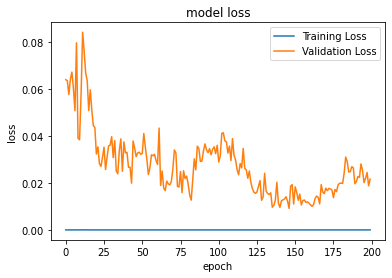

In [646]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [647]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Training RMSE

In [648]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.001719998665047872

Validation RMSE

In [649]:

math.sqrt(mean_squared_error(ytest,test_predict))

0.14715801190486197

Training MEA

In [650]:
mean_absolute_error(y_train,train_predict)

0.0014017907300453995

Validation MEA

In [651]:
mean_absolute_error(ytest,test_predict)

0.11383326567569423

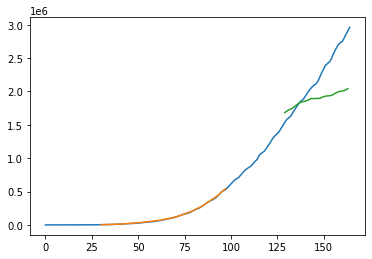

In [652]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
look_back=30
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [174]:
len(test_data)

66

In [175]:
x_input=test_data[16:].reshape(1,-1)
x_input.shape


(1, 50)

In [176]:
x_input

array([[0.34866944, 0.36037127, 0.36626472, 0.3734993 , 0.38681129,
        0.40123351, 0.41456137, 0.4303794 , 0.44344058, 0.45372804,
        0.46184702, 0.47327205, 0.48904012, 0.50527842, 0.51953118,
        0.53233245, 0.54112621, 0.54795469, 0.56324782, 0.57829318,
        0.59267962, 0.60788599, 0.62105857, 0.62944051, 0.63628824,
        0.65041746, 0.66389418, 0.67922039, 0.69075715, 0.7003884 ,
        0.70833083, 0.71516877, 0.7290114 , 0.75191818, 0.77215858,
        0.79102511, 0.80829026, 0.81658679, 0.82444652, 0.83822434,
        0.86154092, 0.88106434, 0.89874671, 0.9140692 , 0.92277823,
        0.92839556, 0.94581464, 0.96510683, 0.98304439, 1.        ]])

In [177]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [178]:
temp_input

[0.3486694423046932,
 0.3603712747793881,
 0.3662647234950085,
 0.3734992955136337,
 0.38681128609437754,
 0.4012335093817871,
 0.41456136525204546,
 0.43037939645738216,
 0.4434405804400559,
 0.45372803923249805,
 0.4618470167517204,
 0.4732720505582894,
 0.4890401229796229,
 0.5052784155774189,
 0.5195311840704392,
 0.5323324473525558,
 0.5411262060151726,
 0.5479546941340961,
 0.5632478205480479,
 0.5782931783980919,
 0.5926796203942558,
 0.6078859940549047,
 0.6210585726235316,
 0.6294405088774734,
 0.6362882378794251,
 0.650417459649843,
 0.6638941791940568,
 0.679220386424443,
 0.6907571523763166,
 0.7003883957896897,
 0.708330829768144,
 0.715168769548906,
 0.7290114034300081,
 0.7519181810141768,
 0.7721585772818506,
 0.7910251069894364,
 0.808290255134109,
 0.8165867888721535,
 0.8244465208095214,
 0.8382243432951599,
 0.8615409179318954,
 0.881064338137253,
 0.8987467096402225,
 0.9140692037177437,
 0.9227782349831659,
 0.9283955601493633,
 0.9458146353582619,
 0.965106827407

In [179]:
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<180):
    
    if(len(temp_input)>50):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0048529]
51
1 day input [0.36037127 0.36626472 0.3734993  0.38681129 0.40123351 0.41456137
 0.4303794  0.44344058 0.45372804 0.46184702 0.47327205 0.48904012
 0.50527842 0.51953118 0.53233245 0.54112621 0.54795469 0.56324782
 0.57829318 0.59267962 0.60788599 0.62105857 0.62944051 0.63628824
 0.65041746 0.66389418 0.67922039 0.69075715 0.7003884  0.70833083
 0.71516877 0.7290114  0.75191818 0.77215858 0.79102511 0.80829026
 0.81658679 0.82444652 0.83822434 0.86154092 0.88106434 0.89874671
 0.9140692  0.92277823 0.92839556 0.94581464 0.96510683 0.98304439
 1.         1.00485289]
1 day output [[1.0049416]]
2 day input [0.36626472 0.3734993  0.38681129 0.40123351 0.41456137 0.4303794
 0.44344058 0.45372804 0.46184702 0.47327205 0.48904012 0.50527842
 0.51953118 0.53233245 0.54112621 0.54795469 0.56324782 0.57829318
 0.59267962 0.60788599 0.62105857 0.62944051 0.63628824 0.65041746
 0.66389418 0.67922039 0.69075715 0.7003884  0.70833083 0.71516877
 0.7290114  0.75191818 0.77215858 0.7910

17 day output [[1.0810813]]
18 day input [0.56324782 0.57829318 0.59267962 0.60788599 0.62105857 0.62944051
 0.63628824 0.65041746 0.66389418 0.67922039 0.69075715 0.7003884
 0.70833083 0.71516877 0.7290114  0.75191818 0.77215858 0.79102511
 0.80829026 0.81658679 0.82444652 0.83822434 0.86154092 0.88106434
 0.89874671 0.9140692  0.92277823 0.92839556 0.94581464 0.96510683
 0.98304439 1.         1.00485289 1.00494158 1.00727165 1.01596534
 1.02684438 1.03506839 1.03968203 1.0427382  1.04631877 1.05090797
 1.05580616 1.06027722 1.06415617 1.06769836 1.07116473 1.07460988
 1.07794356 1.08108127]
18 day output [[1.0840166]]
19 day input [0.57829318 0.59267962 0.60788599 0.62105857 0.62944051 0.63628824
 0.65041746 0.66389418 0.67922039 0.69075715 0.7003884  0.70833083
 0.71516877 0.7290114  0.75191818 0.77215858 0.79102511 0.80829026
 0.81658679 0.82444652 0.83822434 0.86154092 0.88106434 0.89874671
 0.9140692  0.92277823 0.92839556 0.94581464 0.96510683 0.98304439
 1.         1.00485289 1

32 day output [[1.1128788]]
33 day input [0.75191818 0.77215858 0.79102511 0.80829026 0.81658679 0.82444652
 0.83822434 0.86154092 0.88106434 0.89874671 0.9140692  0.92277823
 0.92839556 0.94581464 0.96510683 0.98304439 1.         1.00485289
 1.00494158 1.00727165 1.01596534 1.02684438 1.03506839 1.03968203
 1.0427382  1.04631877 1.05090797 1.05580616 1.06027722 1.06415617
 1.06769836 1.07116473 1.07460988 1.07794356 1.08108127 1.08401656
 1.08679342 1.08945096 1.09199834 1.09442699 1.09673059 1.09891355
 1.10098624 1.10295784 1.10483336 1.10661519 1.10830617 1.10991061
 1.11143327 1.1128788 ]
33 day output [[1.1142508]]
34 day input [0.77215858 0.79102511 0.80829026 0.81658679 0.82444652 0.83822434
 0.86154092 0.88106434 0.89874671 0.9140692  0.92277823 0.92839556
 0.94581464 0.96510683 0.98304439 1.         1.00485289 1.00494158
 1.00727165 1.01596534 1.02684438 1.03506839 1.03968203 1.0427382
 1.04631877 1.05090797 1.05580616 1.06027722 1.06415617 1.06769836
 1.07116473 1.07460988 1

47 day output [[1.1274391]]
48 day input [0.98304439 1.         1.00485289 1.00494158 1.00727165 1.01596534
 1.02684438 1.03506839 1.03968203 1.0427382  1.04631877 1.05090797
 1.05580616 1.06027722 1.06415617 1.06769836 1.07116473 1.07460988
 1.07794356 1.08108127 1.08401656 1.08679342 1.08945096 1.09199834
 1.09442699 1.09673059 1.09891355 1.10098624 1.10295784 1.10483336
 1.10661519 1.10830617 1.10991061 1.11143327 1.1128788  1.11425078
 1.11555243 1.11678684 1.11795759 1.11906803 1.120121   1.12111914
 1.12206519 1.122962   1.1238122  1.12461793 1.12538147 1.12610483
 1.12679005 1.12743914]
48 day output [[1.1280541]]
49 day input [1.         1.00485289 1.00494158 1.00727165 1.01596534 1.02684438
 1.03506839 1.03968203 1.0427382  1.04631877 1.05090797 1.05580616
 1.06027722 1.06415617 1.06769836 1.07116473 1.07460988 1.07794356
 1.08108127 1.08401656 1.08679342 1.08945096 1.09199834 1.09442699
 1.09673059 1.09891355 1.10098624 1.10295784 1.10483336 1.10661519
 1.10830617 1.10991061 

63 day output [[1.134187]]
64 day input [1.07116473 1.07460988 1.07794356 1.08108127 1.08401656 1.08679342
 1.08945096 1.09199834 1.09442699 1.09673059 1.09891355 1.10098624
 1.10295784 1.10483336 1.10661519 1.10830617 1.10991061 1.11143327
 1.1128788  1.11425078 1.11555243 1.11678684 1.11795759 1.11906803
 1.120121   1.12111914 1.12206519 1.122962   1.1238122  1.12461793
 1.12538147 1.12610483 1.12679005 1.12743914 1.12805414 1.12863672
 1.12918854 1.12971115 1.13020599 1.13067448 1.1311183  1.13153851
 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701 1.13362956
 1.1339159  1.13418698]
64 day output [[1.1344438]]
65 day input [1.07460988 1.07794356 1.08108127 1.08401656 1.08679342 1.08945096
 1.09199834 1.09442699 1.09673059 1.09891355 1.10098624 1.10295784
 1.10483336 1.10661519 1.10830617 1.10991061 1.11143327 1.1128788
 1.11425078 1.11555243 1.11678684 1.11795759 1.11906803 1.120121
 1.12111914 1.12206519 1.122962   1.1238122  1.12461793 1.12538147
 1.12610483 1.12679005 1.12

80 day output [[1.1370987]]
81 day input [1.11143327 1.1128788  1.11425078 1.11555243 1.11678684 1.11795759
 1.11906803 1.120121   1.12111914 1.12206519 1.122962   1.1238122
 1.12461793 1.12538147 1.12610483 1.12679005 1.12743914 1.12805414
 1.12863672 1.12918854 1.12971115 1.13020599 1.13067448 1.1311183
 1.13153851 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701
 1.13362956 1.1339159  1.13418698 1.13444376 1.13468671 1.13491654
 1.13513398 1.13533998 1.135535   1.13571954 1.13589394 1.13605917
 1.13621557 1.13636363 1.13650358 1.13663602 1.13676131 1.13688004
 1.13699245 1.13709867]
81 day output [[1.1371992]]
82 day input [1.1128788  1.11425078 1.11555243 1.11678684 1.11795759 1.11906803
 1.120121   1.12111914 1.12206519 1.122962   1.1238122  1.12461793
 1.12538147 1.12610483 1.12679005 1.12743914 1.12805414 1.12863672
 1.12918854 1.12971115 1.13020599 1.13067448 1.1311183  1.13153851
 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701 1.13362956
 1.1339159  1.13418698 1.

98 day output [[1.1382767]]
99 day input [1.12863672 1.12918854 1.12971115 1.13020599 1.13067448 1.1311183
 1.13153851 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701
 1.13362956 1.1339159  1.13418698 1.13444376 1.13468671 1.13491654
 1.13513398 1.13533998 1.135535   1.13571954 1.13589394 1.13605917
 1.13621557 1.13636363 1.13650358 1.13663602 1.13676131 1.13688004
 1.13699245 1.13709867 1.13719916 1.13729429 1.1373843  1.13746953
 1.13755    1.13762617 1.13769829 1.13776672 1.13783145 1.13789272
 1.13795042 1.13800502 1.13805676 1.13810587 1.13815224 1.13819599
 1.13823736 1.1382767 ]
99 day output [[1.1383139]]
100 day input [1.12918854 1.12971115 1.13020599 1.13067448 1.1311183  1.13153851
 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701 1.13362956
 1.1339159  1.13418698 1.13444376 1.13468671 1.13491654 1.13513398
 1.13533998 1.135535   1.13571954 1.13589394 1.13605917 1.13621557
 1.13636363 1.13650358 1.13663602 1.13676131 1.13688004 1.13699245
 1.13709867 1.13719916 

114 day output [[1.1386815]]
115 day input [1.13468671 1.13491654 1.13513398 1.13533998 1.135535   1.13571954
 1.13589394 1.13605917 1.13621557 1.13636363 1.13650358 1.13663602
 1.13676131 1.13688004 1.13699245 1.13709867 1.13719916 1.13729429
 1.1373843  1.13746953 1.13755    1.13762617 1.13769829 1.13776672
 1.13783145 1.13789272 1.13795042 1.13800502 1.13805676 1.13810587
 1.13815224 1.13819599 1.13823736 1.1382767  1.13831389 1.13834906
 1.1383822  1.13841367 1.13844359 1.13847172 1.13849831 1.13852334
 1.13854706 1.13856959 1.13859105 1.1386112  1.13863003 1.13864803
 1.1386652  1.13868153]
115 day output [[1.1386968]]
116 day input [1.13491654 1.13513398 1.13533998 1.135535   1.13571954 1.13589394
 1.13605917 1.13621557 1.13636363 1.13650358 1.13663602 1.13676131
 1.13688004 1.13699245 1.13709867 1.13719916 1.13729429 1.1373843
 1.13746953 1.13755    1.13762617 1.13769829 1.13776672 1.13783145
 1.13789272 1.13795042 1.13800502 1.13805676 1.13810587 1.13815224
 1.13819599 1.138237

133 day output [[1.138866]]
134 day input [1.13746953 1.13755    1.13762617 1.13769829 1.13776672 1.13783145
 1.13789272 1.13795042 1.13800502 1.13805676 1.13810587 1.13815224
 1.13819599 1.13823736 1.1382767  1.13831389 1.13834906 1.1383822
 1.13841367 1.13844359 1.13847172 1.13849831 1.13852334 1.13854706
 1.13856959 1.13859105 1.1386112  1.13863003 1.13864803 1.1386652
 1.13868153 1.13869679 1.13871121 1.1387248  1.13873768 1.13874996
 1.13876164 1.13877261 1.13878286 1.13879263 1.13880193 1.13881075
 1.1388191  1.13882709 1.1388346  1.13884163 1.13884819 1.1388545
 1.13886046 1.13886595]
134 day output [[1.1388713]]
135 day input [1.13755    1.13762617 1.13769829 1.13776672 1.13783145 1.13789272
 1.13795042 1.13800502 1.13805676 1.13810587 1.13815224 1.13819599
 1.13823736 1.1382767  1.13831389 1.13834906 1.1383822  1.13841367
 1.13844359 1.13847172 1.13849831 1.13852334 1.13854706 1.13856959
 1.13859105 1.1386112  1.13863003 1.13864803 1.1386652  1.13868153
 1.13869679 1.13871121 

151 day output [[1.1389288]]
152 day input [1.13841367 1.13844359 1.13847172 1.13849831 1.13852334 1.13854706
 1.13856959 1.13859105 1.1386112  1.13863003 1.13864803 1.1386652
 1.13868153 1.13869679 1.13871121 1.1387248  1.13873768 1.13874996
 1.13876164 1.13877261 1.13878286 1.13879263 1.13880193 1.13881075
 1.1388191  1.13882709 1.1388346  1.13884163 1.13884819 1.1388545
 1.13886046 1.13886595 1.13887131 1.13887644 1.13888133 1.13888597
 1.13889039 1.13889444 1.13889813 1.13890171 1.13890517 1.13890851
 1.1389116  1.13891447 1.13891721 1.13891983 1.13892233 1.1389246
 1.13892674 1.13892877]
152 day output [[1.1389307]]
153 day input [1.13844359 1.13847172 1.13849831 1.13852334 1.13854706 1.13856959
 1.13859105 1.1386112  1.13863003 1.13864803 1.1386652  1.13868153
 1.13869679 1.13871121 1.1387248  1.13873768 1.13874996 1.13876164
 1.13877261 1.13878286 1.13879263 1.13880193 1.13881075 1.1388191
 1.13882709 1.1388346  1.13884163 1.13884819 1.1388545  1.13886046
 1.13886595 1.13887131 

169 day output [[1.1389517]]
170 day input [1.13876164 1.13877261 1.13878286 1.13879263 1.13880193 1.13881075
 1.1388191  1.13882709 1.1388346  1.13884163 1.13884819 1.1388545
 1.13886046 1.13886595 1.13887131 1.13887644 1.13888133 1.13888597
 1.13889039 1.13889444 1.13889813 1.13890171 1.13890517 1.13890851
 1.1389116  1.13891447 1.13891721 1.13891983 1.13892233 1.1389246
 1.13892674 1.13892877 1.13893068 1.13893247 1.13893425 1.13893592
 1.13893759 1.13893902 1.13894033 1.13894165 1.13894296 1.13894415
 1.13894522 1.13894629 1.13894737 1.1389482  1.13894916 1.13895011
 1.13895094 1.13895166]
170 day output [[1.1389523]]
171 day input [1.13877261 1.13878286 1.13879263 1.13880193 1.13881075 1.1388191
 1.13882709 1.1388346  1.13884163 1.13884819 1.1388545  1.13886046
 1.13886595 1.13887131 1.13887644 1.13888133 1.13888597 1.13889039
 1.13889444 1.13889813 1.13890171 1.13890517 1.13890851 1.1389116
 1.13891447 1.13891721 1.13891983 1.13892233 1.1389246  1.13892674
 1.13892877 1.13893068 

In [180]:
day_new=np.arange(1,51)
day_pred=np.arange(51,231)

In [181]:
import matplotlib.pyplot as plt

In [182]:
len(df1)

165

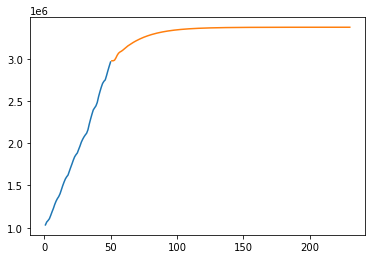

In [183]:
plt.plot(day_new,scaler.inverse_transform(df1[115:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

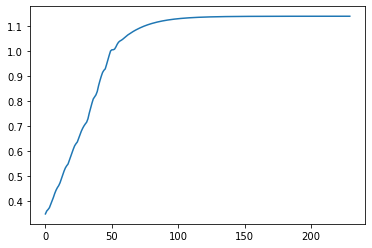

In [184]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[115:])

In [96]:
df3=scaler.inverse_transform(df3).tolist()

Text(0.5, 0, 'Days')

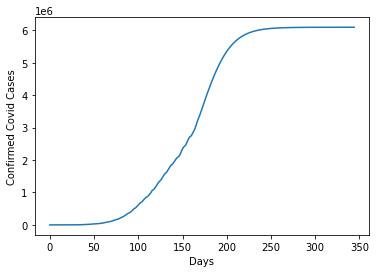

In [97]:
plt.plot(df3)
plt.ylabel("Confirmed Covid Cases")
plt.xlabel("Days")
